# FCT Unesp - TCC Treino 2
Aluno: Pétrus Antonio Bárbosa Pradella

TCC2 - Treinando análise preditiva para dados de transações comerciais.

Teste 1
    - DataSet Utilizado: BigMart Sales Data
    - Fonte: Kaggle
    - Link: https://www.kaggle.com/brijbhushannanda1979/bigmart-sales-data
    
Caracteristicas gerais do Dataset:

    - Número de Instancias: 14204
    - Número de Atributos: 11
    - Estatisticas de Uso em 18/09/2019 (kaggle):
        23,852 views
        5,934 downloads

### Importando as bibliotecas necessárias

In [1]:
from myownapi.AnalyticsLR import AnalyticsLR;

analytics = AnalyticsLR();

AnalyticsLR.getVersion()


'1.0.3b'

### Carregando a base de dados

In [2]:
onlineMode = False;

if onlineMode:
    dataset_folder_url = "http://downloads.finalcraft.com.br/tcc/BigMartSalesData";
else:
    dataset_folder_url = "C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino2";

dataset_file = dataset_folder_url + '/Train.csv';

analytics.read_csv(dataset_file);

analytics.head(3)

Iniciando leitura do arquivo:
 --> C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/TCC BigData Analytics/Treino2/Train.csv
Arquivo lido com sucesso!


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### Descrevendo o DataFrame

In [3]:
analytics.descreverDataFrame()

Variáveis nulas foram encontradas!!
[Criando uma cópia do DataFrame sem as variáveis nulas]


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,NaN,NaN,NaN,33.290000
20%,NaN,8.020000,NaN,0.022558,NaN,84.689240,NaN,NaN,NaN,NaN,666.465800
40%,NaN,11.100000,NaN,0.041754,NaN,118.765040,NaN,NaN,NaN,NaN,1402.174800
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,NaN,NaN,NaN,1794.331000


In [4]:
analytics.columns()

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

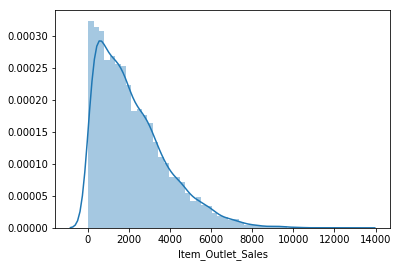

In [12]:
analytics.plotar('Item_Outlet_Sales')

In [5]:
#analytics.descreverAtributo('Outlet_Establishment_Year')

analytics.descreverAtributo('Item_Weight')



count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
20%         8.020000
40%        11.100000
50%        12.600000
60%        14.500000
80%        17.700000
max        21.350000
Name: Item_Weight, dtype: float64

Variáveis nulas foram encontradas!!
[Criando uma cópia do DataFrame sem as variáveis nulas]


ValueError: cannot convert float NaN to integer

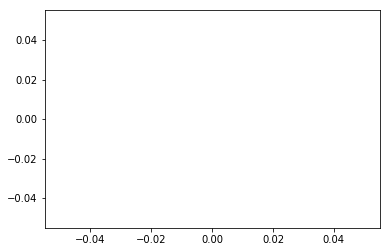

In [6]:
analytics.plotar('Item_Weight')


Um total de 1463 valores nulos foram encontrados.
O valor desses atributos nulos foram definidos para a média dos demais, no caso: 12.857645184136183


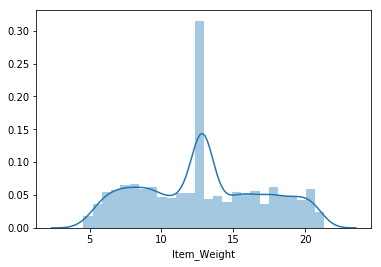

In [8]:
analytics.tratarVariaveisNulasComMediaDasOutras('Item_Weight');
analytics.plotar('Item_Weight')

### Selecionando os atributos

In [19]:
atributosDePrecisao = ['Item_MRP','Outlet_Establishment_Year']; #Maximum Retail Price (Preço MAXIMO de um PRoduto)

#atributosDEPrecisao += ['Outlet_Establishment_Year']; #Ano de criação do estabelecimento
#atributosDePrecisao += ['Item_Weight']; #Peso
#atributosDePrecisao += ['Item_Fat_Content']; #Indice de Gordura
#atributosDePrecisao += ['Item_Visibility']; #Visibilidade
#atributosDePrecisao += ['Item_Type']; #Tipo

analytics.definirAtributosDePrecisao(atributosDePrecisao);

Atributos de precisão definidos para:
-->  Item_MRP
-->  Outlet_Establishment_Year
Total de 2 atributos.


In [20]:
analytics.definirAtributoDesejado('Item_Outlet_Sales');

Definindo atributo desejado para: Item_Outlet_Sales


### Definindo porcentagem de Teste e Aplicando Regressão Linear

In [21]:
analytics.definirPorcentagemDeTeste(0.3);
analytics.aplicarRegressaoLinear();

AttributeError: 'AnalyticsLR' object has no attribute 'definirPorcentagemDeTeste'

## Observando Resultados

Recomendavel conferir na API, tem mais detalhes sobre como é feito cada um desses métodos.

#### Error Quadrático de predição
###### Quanto MENOR MELHOR

Mostra qual a discrepancia entre os dados preditos em comparação ao conjunto de dados separados para treino.

In [9]:
MainAPI.calcularErroMedioQuadratico();

format(MainAPI.erro_quadratico, '.50f')

'2139707.96524525480344891548156738281250000000000000000000'

#### Pesos dos Atributos

###### Essa função relata qual é a % de participação de cada um dos atributos no calculo da regressão linear.

Deve ser usado para observar quais dados devem ou não ser descartados.

In [10]:
MainAPI.calcularCoeficientesDePesos()

,0,Pesos
0,Item_MRP,18.865771
1,Outlet_Establishment_Year,-52.991759


#### R-Squared (Coeficiente de Determinação)
###### Quanto MAIS PRÓXIMO DE 1 MELHOR
Essa função tenta calcular quanto dos resultados são "explicados" pelas variáveis objetidas.

In [11]:
MainAPI.calcularRSQuare()

0.26463176730078786

#### Tratando de Valores nulos

#### Convertendo atributos catégoricos em numéricos

#### Rascunho daqui para baixo
#### Rascunho daqui para baixo
#### Rascunho daqui para baixo
#### Rascunho daqui para baixo


In [12]:
onlineMode2 = True;
if onlineMode2:
    dataset_folder_url = "http://downloads.finalcraft.com.br/tcc/BigMartSalesData";
else:
    dataset_folder_url = "C:/Users/Petrus/Desktop/UNESP/Docs 2016-2020/2019/Segundo Semestre/TCC2/ProjetoTCC2/TreinoLive";

dataset_file = dataset_folder_url + '/Train.csv';

dataframe = MainAPI.read_csv(dataset_file);
dataframe.head(3)

Iniciando leitura do arquivo:
 --> http://downloads.finalcraft.com.br/tcc/BigMartSalesData/Train.csv
Arquivo lido com sucesso!


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


In [13]:
dataframe.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [14]:
#Sumarizar os valores nulos
dataframe.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

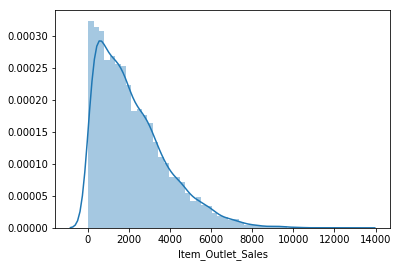

In [15]:
import seaborn  as sb
sb.distplot(dataframe["Item_Outlet_Sales"])




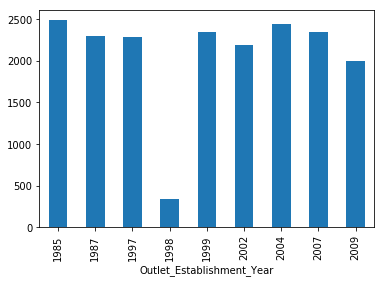

In [16]:
dataframe.groupby('Outlet_Establishment_Year')['Item_Outlet_Sales'].mean().plot.bar()



<BarContainer object of 8523 artists>

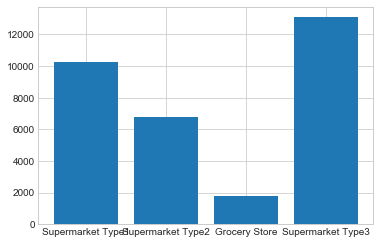

In [17]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')      #Estilizando

plt.bar(dataframe["Outlet_Type"],dataframe["Item_Outlet_Sales"])